# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# Choose three samples from the beginning, middle and end of the dataset
indices = [1, 150,300] 

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,16225,1825,1765,853,170,1067
2,16448,6243,6360,824,2662,2005


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

It is hard to accurately identify the segment of each data sample by just looking at the table above. However, some general difference and signatures are present in the data samples, which makes Sample 0, 2 are more similar to each other and more distinctive compared with Sample 1:
- Except for *Milk, Grocery, Detergents_Paper*, the values for the other features are all similar to each other. One sample may have larger or smaller value for one feature but not hugely different. For example, in *Fresh*, Sample 1, 2 have about 2 times the amount of Sample 0. But these values are still on the same order.
- The values in *Detergents_Papers* differ the most by an order of magnitude. Sample 0, 2 buy way more than Sample 1. Sample 0, 2 also buy more *Milk, Grocery* than Sample 1, by 6 to 9 times more in amount.

I will guess that Sample 0, 2 are retailers, since they buy way more *Milk, Grocery, Detergents_Paper*. Sample 1 could be a restaurant, since it buys lots of Fresh but not much for other stuff.

**Supplementary Answer after review:**


From the box-and-whisker plot below, we can confidently say that Sample 0 and 2 are more similar to each other compared with Sample 1.


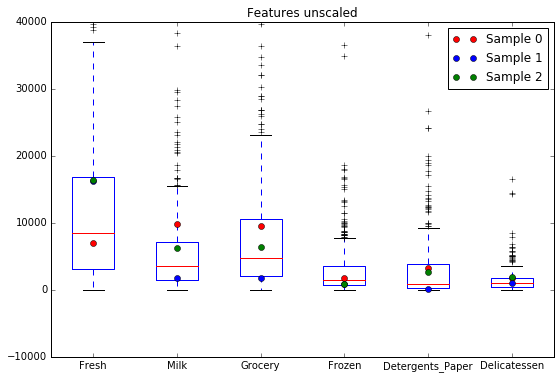

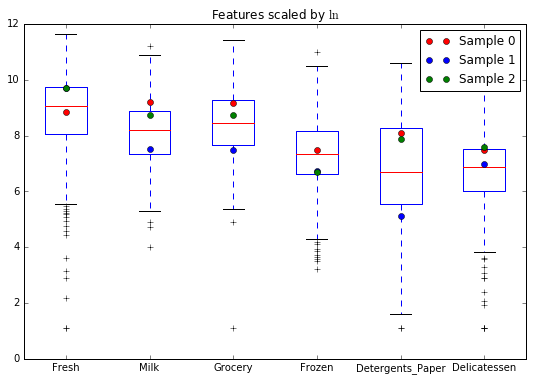

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=[9,6])
ax=plt.subplot(111)
data.plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(samples[d]))+i
    ax.plot(x[0],samples[d][0],'ro',label='Sample 0')
    ax.plot(x[1],samples[d][1],'bo',label='Sample 1')
    ax.plot(x[2],samples[d][2],'go',label='Sample 2')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3],loc='upper right')

ax.set_ylim(-10000,40000)
ax.set_title('Features unscaled')

plt.figure(figsize=[9,6])
ax=plt.subplot(111)
np.log(data).plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(samples[d]))+i
    ax.plot(x[0],np.log(samples[d][0]),'ro',label='Sample 0')
    ax.plot(x[1],np.log(samples[d][1]),'bo',label='Sample 1')
    ax.plot(x[2],np.log(samples[d][2]),'go',label='Sample 2')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3],loc='upper right')
ax.set_title(r'Features scaled by $\ln$')

# ax.set_ylim(-10000,40000)


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

for drop_col in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([drop_col],axis=1,inplace=False)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[drop_col], test_size=0.25, random_state=1)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=1)
    regressor.fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
#     score = regressor.score(X_test,y_test) # the score of DecisionTreeRegressor is R^2
    score = r2_score(y_test,regressor.predict(X_test))
    print drop_col,score

Fresh -0.923373659298
Milk 0.515849943807
Grocery 0.795768311576
Frozen -0.649574327334
Detergents_Paper 0.815241279195
Delicatessen -0.429125195659


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I think we can predict *Detergent_Paper*. The $R^2$ score for the prediction of this feature is the highest, 0.82. Prediction of *Grocery* is possible, which has $R^2$ score of 0.80. 

If we remove one feature, e.g. *Detergent_Paper*, and are able to predict this feature with the remaining features with a high $R^2$ score, it means that without this feature, the rest of the features can achieve the same goal. Thus this feature, e.g. *Detergent_Papar*, will not be necessary to identify spending habits, if we provide all the other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

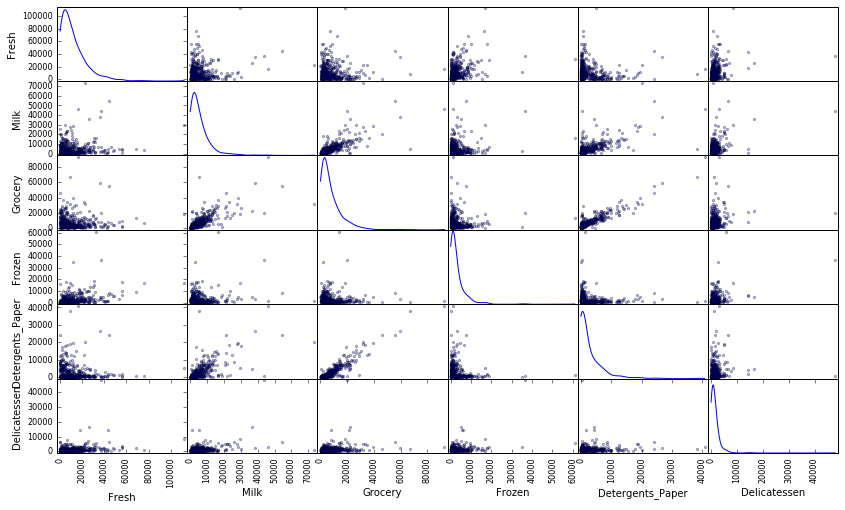

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Yes, I can identify correlations between:
1. Milk vs Grocery
2. Milk vs Detergents_Paper
3. Grocery vs Detergents_Paper

This confirms my suspicions. Actually, the plots showing a linear trend between two features mean that there is high relevance between them.

None of the features are normally distributed. All the distributions are highly skewed. In the following parts, once the features are scaled, we can identify more patterns in the distribution. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

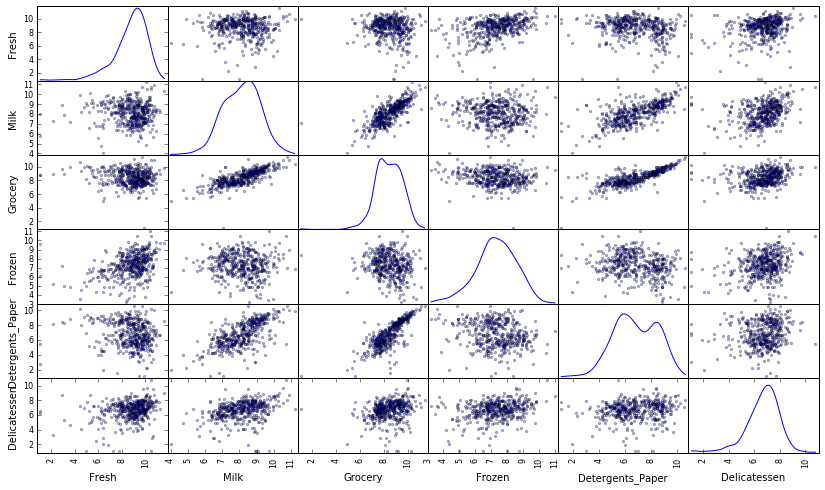

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

**Comments:**

After feature scaling, the distributions look much nicer. *Fresh, Frozen, Delicatessen* have distributions similar to normal distribution. *Milk, Grocery, Detergents_Paper* has interesting distributions with bi-mode (very clear for *Detergents_Paper*, not ver clear for *Milk*). These bi-modal distributions indicate that they contain informaiton to seperate the customer into two groups. 

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,9.694309,7.509335,7.475906,6.748760,5.135798,6.972606
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
# print log_data.mean()

feature_outlier=list()
feature_name=list()

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print 'Mean of Feature '+feature+': ',log_data[feature].mean()
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    feature_name.append(feature)
    feature_outlier.append(set(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index))
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
for i in range(len(feature_outlier)-1):
#     print i
    for j in range(i+1,len(feature_outlier)):
        joint=feature_outlier[i]&feature_outlier[j]
        if len(joint):
            print 'Data points considered as outliers on two features,',feature_name[i]+'_'+feature_name[j],':',
            print list(joint)
            outliers +=list(joint)
outliers=list(set(outliers))
print 80*'*'
print 'The follwing indices will be dropped out:'
print outliers


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Mean of Feature Fresh:  8.7305440412
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Mean of Feature Milk:  8.12104706712
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Mean of Feature Grocery:  8.44116877158
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Mean of Feature Frozen:  7.30139573692
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Mean of Feature Detergents_Paper:  6.78597202135
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Mean of Feature Delicatessen:  6.66513305201
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Data points considered as outliers on two features, Fresh_Frozen : [65]
Data points considered as outliers on two features, Fresh_Delicatessen : [128, 66]
Data points considered as outliers on two features, Milk_Grocery : [154]
Data points considered as outliers on two features, Milk_Delicatessen : [154]
Data points considered as outliers on two features, Grocery_Detergents_Paper : [75]
Data points considered as outliers on two features, Grocery_Delicatessen : [154]
********************************************************************************
The follwing indices will be dropped out:
[128, 65, 66, 75, 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there are:
```
Data points considered as outliers on two features, Fresh_Frozen : [65]
Data points considered as outliers on two features, Fresh_Delicatessen : [128, 66]
Data points considered as outliers on two features, Milk_Grocery : [154]
Data points considered as outliers on two features, Milk_Delicatessen : [154]
Data points considered as outliers on two features, Grocery_Detergents_Paper : [75]
Data points considered as outliers on two features, Grocery_Delicatessen : [154]
********************************************************************************
The follwing indices will be dropped out:
[128, 65, 66, 75, 154]
```

So I decided to remove these samples considered outliers for more than one feature based on the definition above.

**Supplementary Answer after review:**

The outliers that we are going to remove are the red dots in the figures below. As we can see, the outliers we are going to remove are the outliers for at least two features.


Reviewer suggested this article (http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/) for discussion of varieties of outliers.I think that the outlier we are going to remove is similar to the third category, which is "More commonly, the outlier affects both results and assumptions.  In this situation, it is not legitimate to simply drop the outlier.".

Later, we are going to perform PCA dimention reduction. These outliers will probably bias the axes of PCA components as it is trying to maximize the variance along each axis sequentially. Also, these outliers may become the outliers in the reduced dimention. When we are going to do clustering using K-Mean or other method, these outliers could affect the locations of the boundary between clusters, thus affecting the clustering result. In the worst case, there could be a extra clusters for these outliers, especially if they are closer to each other.

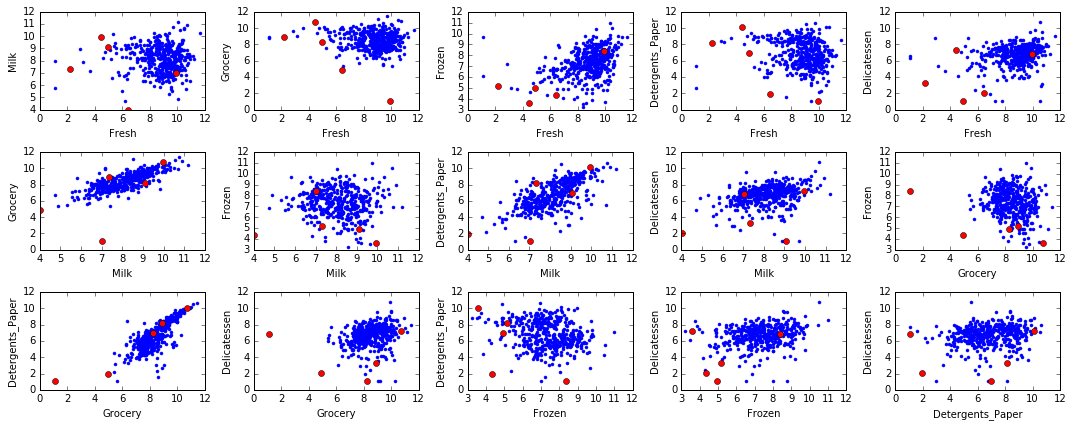

In [10]:
plt.figure(figsize=[15,6])

index=[128, 65, 66, 75, 154]

data.iloc[index]
k=0
for i,d1 in enumerate(log_data):
    for j,d2 in enumerate(log_data):
#         print i,d
        if j>i:
            k += 1
            plt.subplot(3,5,k)
            plt.plot(log_data[d1],log_data[d2],'b.')
            for loc in index:
                plt.plot(log_data[d1][loc],log_data[d2][loc],'ro')
            plt.xlabel(d1)
            plt.ylabel(d2)
plt.tight_layout()

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimensions : 6


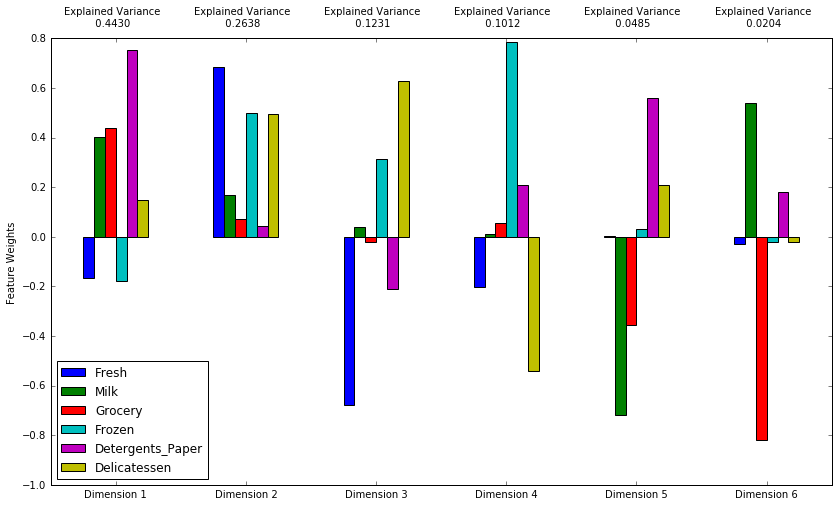

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
print 'Dimensions :',len(good_data.columns)
PCA_model=PCA(n_components=len(good_data.columns))

pca = PCA_model.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = PCA_model.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [12]:
print pd.DataFrame(np.round(pca.explained_variance_, 4), columns = ['Explained Variance'])
print pd.DataFrame(np.round(pca.explained_variance_ratio_, 4), columns = ['Explained Variance Ratio'])
print pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())

   Explained Variance
0              4.5384
1              2.7023
2              1.2607
3              1.0368
4              0.4969
5              0.2091
   Explained Variance Ratio
0                    0.4430
1                    0.2638
2                    0.1231
3                    0.1012
4                    0.0485
5                    0.0204
    Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0 -0.1675  0.4014   0.4381 -0.1782            0.7514        0.1499
1  0.6859  0.1672   0.0707  0.5005            0.0424        0.4941
2 -0.6774  0.0402  -0.0195  0.3150           -0.2117        0.6286
3 -0.2043  0.0128   0.0557  0.7854            0.2096       -0.5423
4  0.0026 -0.7192  -0.3554  0.0331            0.5582        0.2092
5 -0.0292  0.5402  -0.8205 -0.0205            0.1824       -0.0197


### Extra:

I want to write a summary of **PCA** and how to explain the diagram above:

Let $\bf{X}$ matrix be the data we have. $\bf{X}$ is $n \times m$ matrix, where $n$ is the number of data points, $m$ is the number of features.

After subtracting the mean of each feature entries, the covariance of the data is $\frac{\bf{X^T X}}{n}$, $n$ is just a nomalization factor, we can ignore it for now.

Since covariance matrix has nice properties (real, symmetric), it can be decomposed as:
$$
\bf{X^T X}=\bf{V \Sigma V^T}
$$
where $\bf V$ is orthognal matrix ($ \bf V^T V = V V^T = I$).

$\bf X$ can also be decomposed using SVD method:
$$
\bf X = U S V^T
$$
Where both $\bf U$ and $\bf V$ are orthognal matrix. It is easy to get $\bf X^T = V S^T U^T$. We get get
$$
\bf{X^T X}=\bf{V S^T S V^T}
$$
$\bf U$ is $n \times n$ matrix, $\bf S$ is $n \times m$ matrix, $\bf V$ is $m \times m$ matrix. $\bf S$ contains the singular values and is a ''diagnal'' matrix. Assume the singular values are $s_1, s_2, ... s_m$. Let's also assume $s_1 > s_2 > ... > s_m$. If not, we can always reorder $\bf U, S, V$.

$\bf V = [v_1 v_2 ... v_m]$, with $\bf v_i$ as a column vector, corresponding to singular value $s_i$.  $\bf U$ seems not important here, we just ignore it.

#### PCA method
For **PCA** method, we choose the $k$ largest singular values and ignore the rest ($k \leq m$). The corresponding $\bf V_k=[v_1 v_2 ... v_k]$.

To reduce the dimention, the new coordinate in the reduced dimention is 
$$
\bf Z = X V_k
$$
$\bf Z$ is $n \times k$ matrix, where $n$ is still number of data points and $k$ is number of new dimention.

To recover the data to its original dimention, we do
$$
\bf X_{approx} = Z V_k^T
$$
Please notice that $\bf X_{approx} \neq X$, which means that we can never fully recover the original dataset. We can just put it back to its original dimention.

### Interprete the diagram above
We need to understand what **Explained variance ratio** and **feature weights** are.

Here is the source code for sklearn PCA():
```python
        U, S, V = randomized_svd(X, n_components,
                                 n_iter=self.iterated_power,
                                 random_state=random_state)
        # comments by Jiyao Li: this V should be V^T.

        self.explained_variance_ = exp_var = (S ** 2) / n_samples
        full_var = np.var(X, axis=0).sum()
        self.explained_variance_ratio_ = exp_var / full_var
        self.singular_values_ = S  # Store the singular values.
        self.components_ = V
```

```full_var``` is total variance, which is just the sum of the diagnal components of the covariance matrix, $\bf X^T X$.

```explained_variance_``` is the diagnal components of the $\bf \Sigma$ matrix (which is already a diagnal matrix), or the $\bf S^T S$ matrix.

OK, some more comments here! If we set a tranfer method as:
$$
\bf Y=XV
$$
Then the covariance matrix of $\bf Y$ will be guaranteed to be diagnal, which means there is no correlation between the new features in the new space. Because:
$$
\bf Y^T Y=V^T X^T X V =S^T S= \Sigma
$$

```explained_variance_ratio_``` is just $s_i^2$/```full_var```.

```components_ = V``` explains what ```components_``` is, which is the weight of the features. 

Know that $\bf V=[v_1 v_2 ... v_m] $, we can also see that:

$
\bf{X^T X = V S^T S V^T} = $$s_1^2$$ \bf{v_1 v_1^T}+ $$s_2^2$$ \bf{v_2 v_2^T} +$$s_i^2$$ \bf{v_i v_i^T} + ... +$$s_m^2$$ \bf{v_m v_m^T}
$

($s_i$ should all be scalar, thus non-bold font).
$\bf v_i$ is the feature weight, corresponding to dimention $i$. 
$\bf v_i$$= [v_{i0} v_{i1} v_{i2} ... v_{ij} ... v_{im}]^T $, in which $v_{ij}$ corresponds to the weight of feature $j$ in dimention $i$.

**Now we can see the meaning of the feature weight:**

$s_i^2 v_{ij} v_{il}$ is how much the covariance of feature $j$ and $l$ in dimention $i$ will contribute to the the covariance of feature $j$ and $l$ in the original space ($\bf X^T X$). $s_i^2 v_{ij}^2$ is how much the variance of feature $j$ in dimention $i$ will contribute to the the variance of feature $j$ in the original space ($\bf X^T X$).


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first and second principal components combined explain 70.68% of the total variance. The first four principal components explain 93.11% of the total variance.

If we set the threshold in the weight to be 0.40, in order to discuss its importance, then we can say:

- Dimention 1 is highly correlated with Detergents_Paper, Milk and Grocery. Their weights are all positive. This means that these three features vary together. And this dimention could possible seperate retailers from non-retailers.
- Dimention 2 explains mainly the variance of Fresh, then Frozen and Delicatessen. They all have positive weights. This dimention could possible seperate restaurant-like business from others.
- Dimention 3 explains mainly the variance of Fresh, then Delicatessen. Fresh has negative weight and Delicatessen has positive weight, meaning they are negatively-correlated in this dimention. I guess this will sperate hotel/cafe from others? (Not sure which place needs Fresh or Delicatessen...)
- Dimention 4 explains mainly the variance of Frozen, then Delicatessen. Frozen has posive weight and Delicatessen has negative weight, meaning they are negatively-correlated in this dimention. I guess this will also sperate hotel/cafe from others? (Not sure which place needs Frozen or Delicatessen...)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7887,0.8123,0.2315,-0.0036,-0.1194,0.2106
1,-1.9406,0.2418,-0.2884,-1.2041,-0.0917,0.1492
2,1.2804,0.9587,-0.4701,-0.9124,0.2345,0.2514


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Apply PCA by fitting the good data with only two dimensions
PCA_model=PCA(n_components=2)

pca = PCA_model.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = PCA_model.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = PCA_model.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7887,0.8123
1,-1.9406,0.2418
2,1.2804,0.9587


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

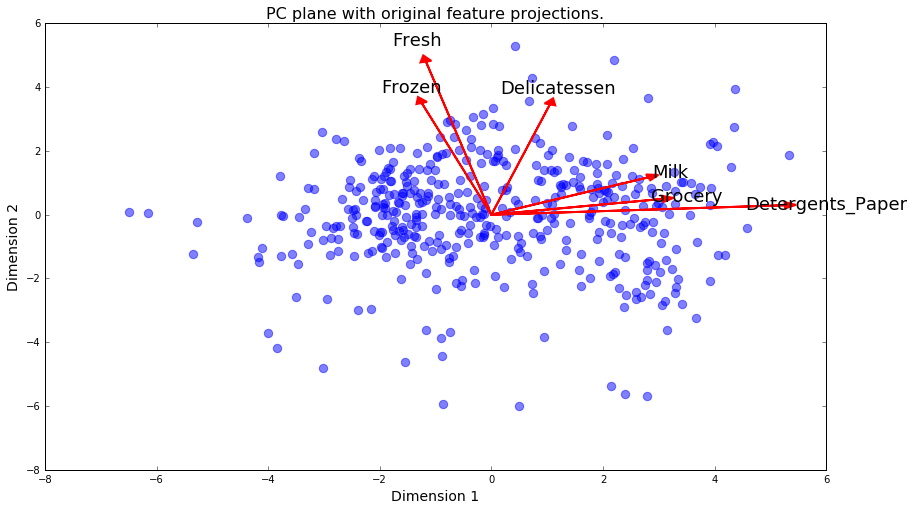

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
- K-Means is basically doing a L2 norm to minimize the data point distance to the cluster centroid. So it works great if the clusters are spherical and clearly seperable. It is not good when there are outliers (because of L2 norm giving lots of weights to outliers).
- Gaussian Mixture is implementing Expectation-Maximization. It defines groups with distributions with unknown parameters (for Gaussian Mixture the distribution is Gaussian), for learning these parameters Expectation-Maximization is to be used. GMM also works great when the clusters are not spherical (e.g. elongated ellipse).
- K-Means defines hard bound. Once a sample is included in one group, it has on relationship with the other group.
- Gaussin Mixture Model defines soft bound. It give different possibility for a sample to all the other groups. In this way, it also give probability of the estimation.

K-Means method is very simple in terms of idea and implementation. Gaussian Mixture model is more complicated. I initially thought that K-Means will run faster. However, this link (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4433949/) concludes that both of them have similar accuracy and speed.

Based on the scaled data we have, I think both K-Means and GMM should work well, since it looks like there are two clusters in spherical shape.

I tested both K-Means and GMM. From the test results, K-Means seems better. K-Means has a higher silhouette score. And in the visualization plot, K-Means seperate the clusters better, for the data points at the boulder of two clusters but on the outside.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n in range(6,1,-1):
    clusterer = KMeans(n_clusters=n,random_state=1).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print n,'clusters, score is ', score

6 clusters, score is  0.364588881579
5 clusters, score is  0.340750045423
4 clusters, score is  0.331256525802
3 clusters, score is  0.397423420008
2 clusters, score is  0.426281015469


In [18]:
centers

array([[ 2.17322969, -0.15659534],
       [-1.49093664,  0.10743169]])

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

model with 2 clusters has the highest sihouette score, which is 0.43.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

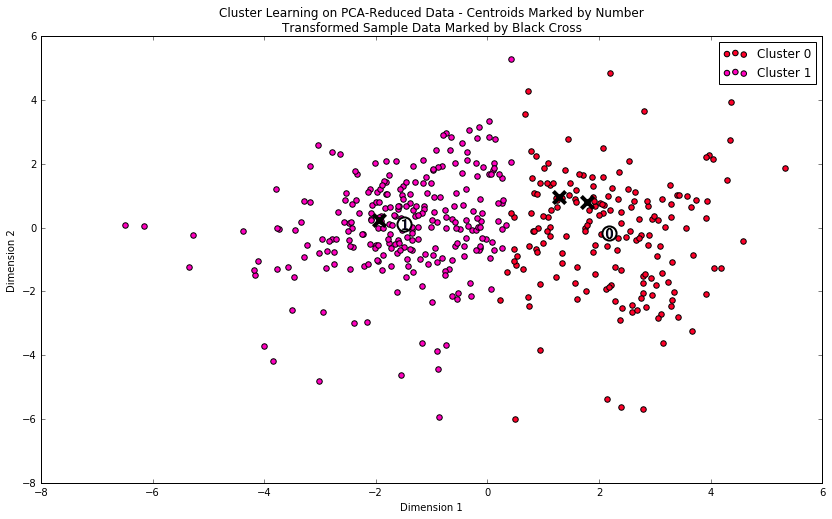

In [19]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

For reasons I gave in Question 1, I think Segment 0 should be more like retailer and Segment 1 should be more like restaurant or something similar.

And please refer to the next two plots below:

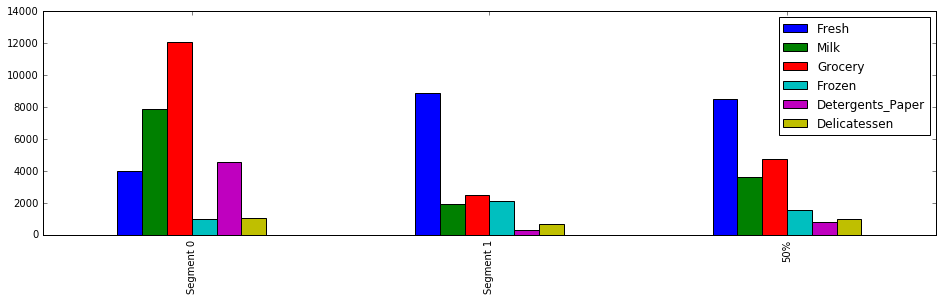

In [21]:
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

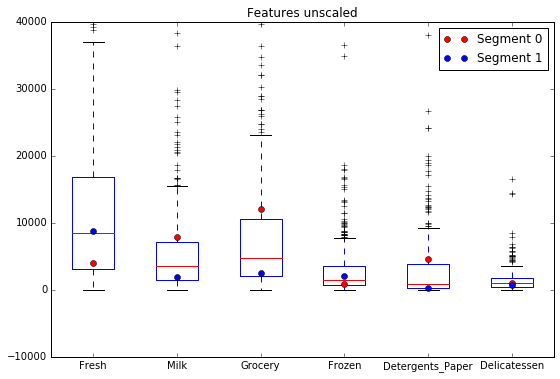

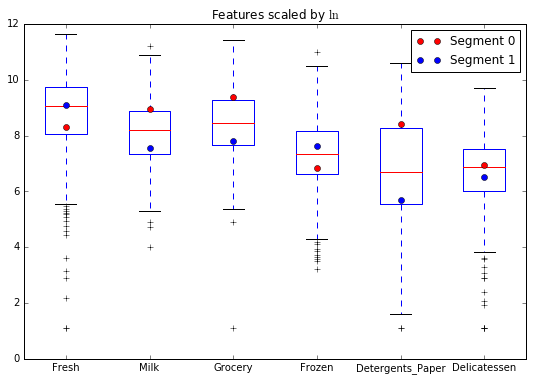

In [22]:
plt.figure(figsize=[9,6])
ax=plt.subplot(111)
data.plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(true_centers[d]))+i
    ax.plot(x[0],true_centers[d][0],'ro',label='Segment 0')
    ax.plot(x[1],true_centers[d][1],'bo',label='Segment 1')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2],loc='upper right')

ax.set_ylim(-10000,40000)
ax.set_title('Features unscaled')

plt.figure(figsize=[9,6])
ax=plt.subplot(111)
np.log(data).plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(true_centers[d]))+i
    ax.plot(x[0],np.log(true_centers[d][0]),'ro',label='Segment 0')
    ax.plot(x[1],np.log(true_centers[d][1]),'bo',label='Segment 1')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2],loc='upper right')
ax.set_title(r'Features scaled by $\ln$')

# ax.set_ylim(-10000,40000)

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Sample points 0, 2 are in Segment 0. Sample point 1 is in Segment 1. 

Comparing this result with my answer to Question 1 and 8, My previous prediction is correct.

** Supplementary Answer: **

More evidence from the figure below:

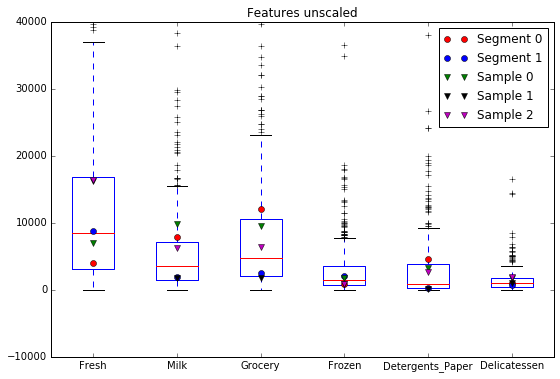

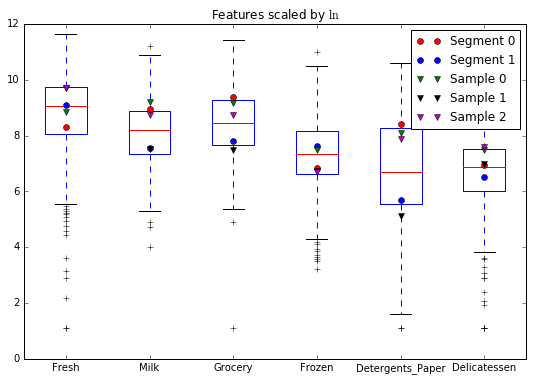

In [24]:
plt.figure(figsize=[9,6])
ax=plt.subplot(111)
data.plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(samples[d]))+i
    ax.plot(x[0],true_centers[d][0],'ro',label='Segment 0')
    ax.plot(x[1],true_centers[d][1],'bo',label='Segment 1')
    ax.plot(x[0],samples[d][0],'gv',label='Sample 0')
    ax.plot(x[1],samples[d][1],'kv',label='Sample 1')
    ax.plot(x[2],samples[d][2],'mv',label='Sample 2')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5],loc='upper right')

ax.set_ylim(-10000,40000)
ax.set_title('Features unscaled')

plt.figure(figsize=[9,6])
ax=plt.subplot(111)
np.log(data).plot.box(ax=ax)

for i, d in enumerate(data):
#     print i, d
    x=np.ones(len(samples[d]))+i
    ax.plot(x[0],np.log(true_centers[d][0]),'ro',label='Segment 0')
    ax.plot(x[1],np.log(true_centers[d][1]),'bo',label='Segment 1')
    ax.plot(x[0],np.log(samples[d][0]),'gv',label='Sample 0')
    ax.plot(x[1],np.log(samples[d][1]),'kv',label='Sample 1')
    ax.plot(x[2],np.log(samples[d][2]),'mv',label='Sample 2')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5],loc='upper right')
ax.set_title(r'Features scaled by $\ln$')

# ax.set_ylim(-10000,40000)

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

From my reading of A/B tests, it is a control-variable test to check whether a change has positive, negative or none effect. It split the testing sample into equal number groups. Each group is different from another group by only one variable. And one of the groups is set as reference, which is just the 'old case' without any changes compared with previous model.

To apply A/B tests for our data to see if changes in delivery service is affecting customers' behavior. I have two plans:

1. If we can use historical data as comparison, we can just change the delivery sevice to both segments. Then we compare current customer behavior with historical customer behavior. Then we can tell whether the delivery service change is affecting one of the segment, or both, or none of them.

2. We can split both the Segment 0 and Segment 1 customers equally into two subgroups (Segment 0A, 0B, 1A, 1B). Then we keep the delivery service unchanged for 0A and 1A but change it for 0B and 1B. Then we can check the behaviors of Segment 0B and 1B and compare them with 0A and 1A.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

After we are done with clustering with current dataset, we can label them. Then the labeled data can be used to train a classifier model. With the trained mode, we can predicted new data based on its features.

The data in Segment 0 will be assigned one label, e.g. 0. And the data in Segment 1 is assgined with another label, e.g. 1. Then we can either use the original 6 features to train the model, or the 2-dimentional reduced features. If we use the reduced dimentional features to train the model, we also need to do PCA transform to the new dataset before making predictions.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

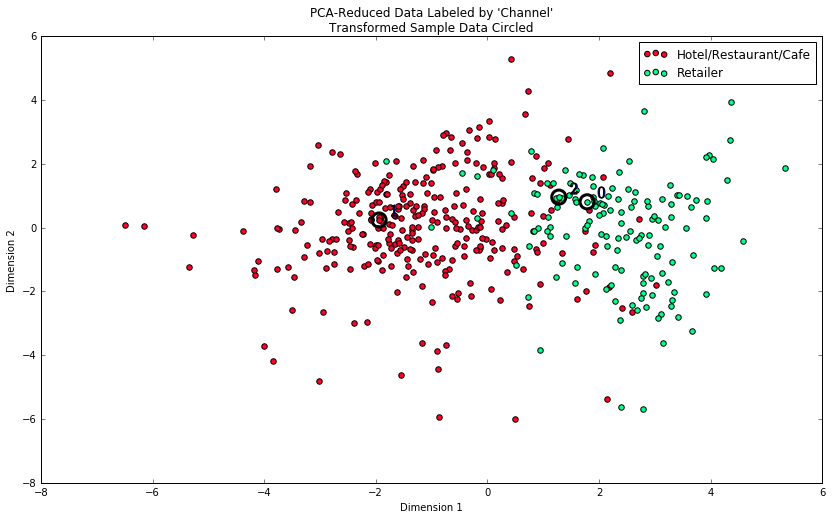

In [25]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Yes, my clustering result fit pretty well with these two establishment segment, using K-Means method. Segment 0 should be Retailer and Segment 1 should be Hotel/Restaurant/Cafe. 

Looking into the channels, the data is still noisy. Although majority of the labeled data are consistent with my clustered data, some Retailers are in Segment 1 and some Hotel/Restaurant/Cafe data are in Segment 0. But overall, the clustering result is good.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# Extra: try the other clustering method (Gaussian Mixture Model)

In [26]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

for n in range(6,1,-1):
    clusterer = GMM(n_components=n,random_state=1).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print n,'clusters, score is ', score

6 clusters, score is  0.28739910844
5 clusters, score is  0.277006754052
4 clusters, score is  0.332470648079
3 clusters, score is  0.376166165091
2 clusters, score is  0.411818864386


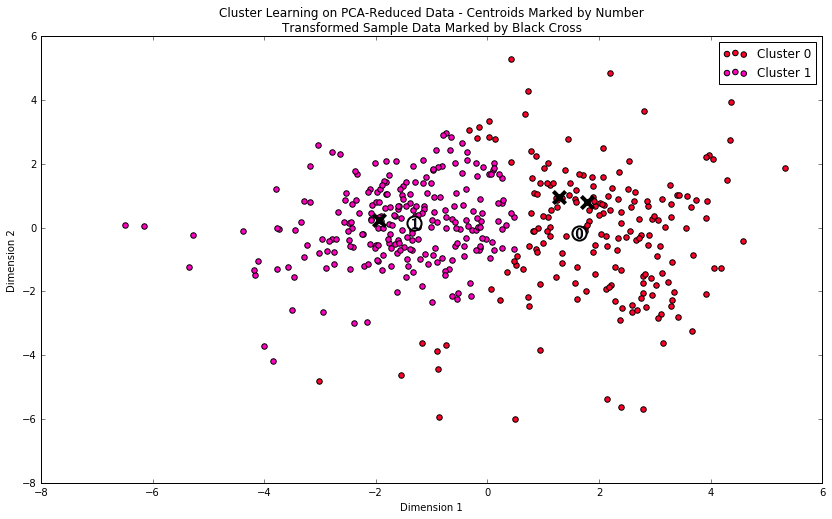

In [27]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)